# PREDICTION OF MUSIC GENRE BASED ON SOUND FEATURES AND TRACK TITLES

### By Shailesh Rao 

In [1]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
%matplotlib inline



## Analysing the data

In [2]:
genre_df = pd.read_csv("genre_df.csv", sep='\t')


In [3]:
genre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1337 non-null   int64  
 1   danceability      1337 non-null   float64
 2   energy            1337 non-null   float64
 3   key               1337 non-null   int64  
 4   loudness          1337 non-null   float64
 5   mode              1337 non-null   int64  
 6   speechiness       1337 non-null   float64
 7   acousticness      1337 non-null   float64
 8   instrumentalness  1337 non-null   float64
 9   liveness          1337 non-null   float64
 10  valence           1337 non-null   float64
 11  tempo             1337 non-null   float64
 12  duration_ms       1337 non-null   int64  
 13  time_signature    1337 non-null   int64  
 14  track_name        1337 non-null   object 
 15  artist            1337 non-null   object 
 16  genre             1337 non-null   object 


In [4]:
genre_df.describe()


,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1.337000e+03,1337.000000
mean,16.212416,0.572981,0.529001,4.948392,-11.285420,0.669409,0.118479,0.392322,0.323511,0.219546,0.454536,117.923011,2.036005e+05,3.898280
std,16.884330,0.176373,0.302064,3.664386,8.209184,0.470602,0.121652,0.399129,0.406324,0.216636,0.235372,30.350770,1.050980e+05,0.477147
min,0.000000,0.074200,0.001950,0.000000,-42.892000,0.000000,0.024600,0.000002,0.000000,0.022300,0.035900,47.139000,1.516000e+04,1.000000
25%,5.000000,0.442000,0.241000,1.000000,-16.768000,0.000000,0.041600,0.021600,0.000000,0.098600,0.262000,92.926000,1.317620e+05,4.000000
50%,11.000000,0.580000,0.575000,5.000000,-7.765000,1.000000,0.061700,0.193000,0.007570,0.128000,0.443000,118.352000,2.033670e+05,4.000000
75%,22.000000,0.720000,0.795000,8.000000,-5.096000,1.000000,0.149000,0.865000,0.853000,0.246000,0.623000,138.668000,2.523600e+05,4.000000
max,99.000000,0.964000,0.995000,11.000000,-1.192000,1.000000,0.912000,0.996000,0.992000,0.994000,0.971000,211.092000,1.233917e+06,5.000000


## Exploration of numeric features based on genre:

### Explanation of how genres are differentiated based on audio features:

#### danceability

<AxesSubplot:xlabel='genre', ylabel='danceability'>

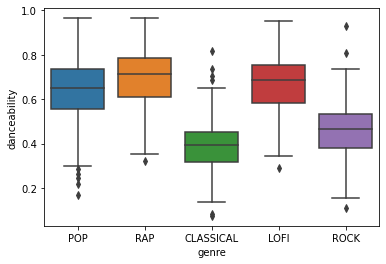

In [5]:
sns.boxplot(x=genre_df['genre'], y=genre_df['danceability'])


-> high danceability for rap, pop, and low for classical

#### energy

<AxesSubplot:xlabel='genre', ylabel='energy'>

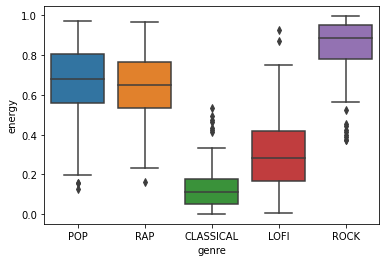

In [6]:
sns.boxplot(x=genre_df['genre'], y=genre_df['energy'])


-> lowest energy for classical music and lofi, very high for rock

#### loudness

<AxesSubplot:xlabel='genre', ylabel='loudness'>

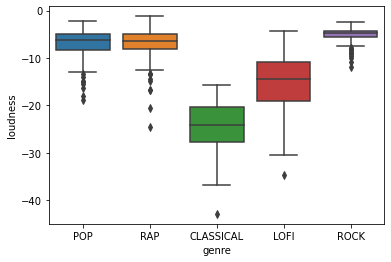

In [7]:
sns.boxplot(x=genre_df['genre'], y=genre_df['loudness'])


-> low loudness for classical and lofi, higher for pop, rap and rock

#### speechiness

<AxesSubplot:xlabel='genre', ylabel='speechiness'>

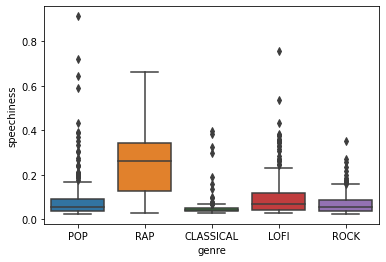

In [8]:
sns.boxplot(x=genre_df['genre'], y=genre_df['speechiness'])


-> high speechiness for rap because of more lyrics 

#### acousticness

<AxesSubplot:xlabel='genre', ylabel='acousticness'>

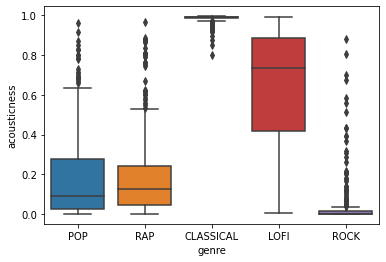

In [9]:
sns.boxplot(x=genre_df['genre'], y=genre_df['acousticness'])


-> classical has very high acousticness, rock has extremely low acousticness because of electric guitar, heavy drums

#### instrumentalness

<AxesSubplot:xlabel='genre', ylabel='instrumentalness'>

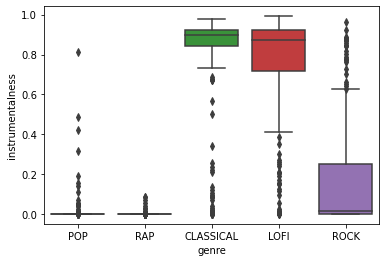

In [10]:
sns.boxplot(x=genre_df['genre'], y=genre_df['instrumentalness'])


-> classical and lofi are purely instrumental, hence have higher instrumentalness

#### liveness

<AxesSubplot:xlabel='genre', ylabel='liveness'>

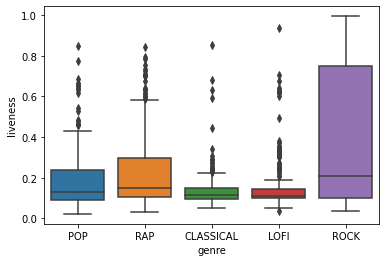

In [11]:
sns.boxplot(x=genre_df['genre'], y=genre_df['liveness'])


-> not much variation in data

### valence

#### (describes the musical positiveness conveyed by a track)

<AxesSubplot:xlabel='genre', ylabel='valence'>

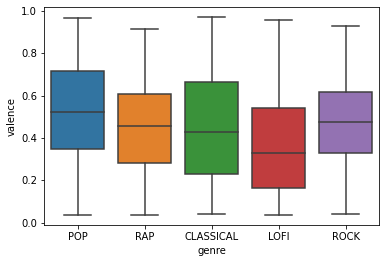

In [12]:
sns.boxplot(x=genre_df['genre'], y=genre_df['valence'])


-> low valence for classical and lofi

#### tempo

<AxesSubplot:xlabel='genre', ylabel='tempo'>

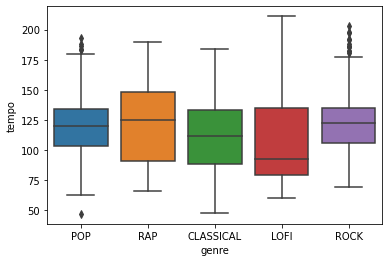

In [13]:
sns.boxplot(x=genre_df['genre'], y=genre_df['tempo'])


-> lofi music has low average tempo, while rap has higher average tempo

#### duration

<AxesSubplot:xlabel='genre', ylabel='duration_ms'>

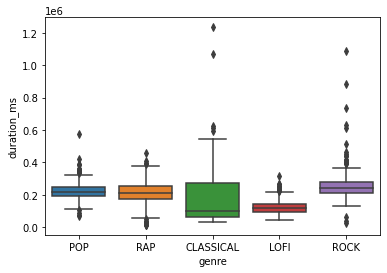

In [14]:
sns.boxplot(x=genre_df['genre'], y=genre_df['duration_ms'])


-> classical songs have a highly varying duration

<AxesSubplot:>

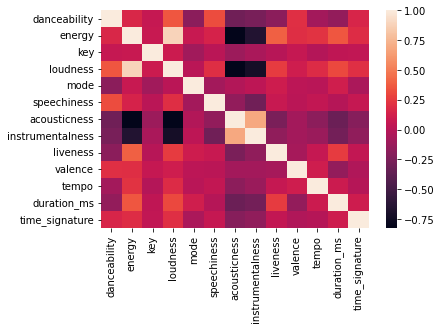

In [15]:
sns.heatmap(genre_df.drop(['Unnamed: 0'], axis = 1).corr())

### Categorical columns

#### key

In [16]:
key_map = {0: 'C',
           1: 'C#',
           2: 'D',
           3: 'Eb',
           4: 'E',
           5: 'F',
           6: 'F#',
           7: 'G',
           8: 'Ab',
           9: 'A',
           10: 'Bb',
           11: 'B'}
genre_df["key"] = genre_df["key"].map(key_map)
key = pd.get_dummies(genre_df['key'])
genre_df = pd.concat([genre_df, key], axis=1)
genre_df.drop('key', axis=1, inplace=True)


key_df = pd.pivot_table(genre_df,
                        values=['C', 'C#', 'D', 'Eb', 'E', 'F',
                                'F#', 'G', 'Ab', 'A', 'Bb', 'B'],
                        index='genre',
                        aggfunc={"C": np.sum,
                                 "C#": np.sum,
                                 "D": np.sum,
                                 "Eb": np.sum,
                                 "E": np.sum,
                                 "F": np.sum,
                                 "F#": np.sum,
                                 "G": np.sum,
                                 "Ab": np.sum,
                                 "A": np.sum,
                                 "Bb": np.sum,
                                 "B": np.sum})


[]

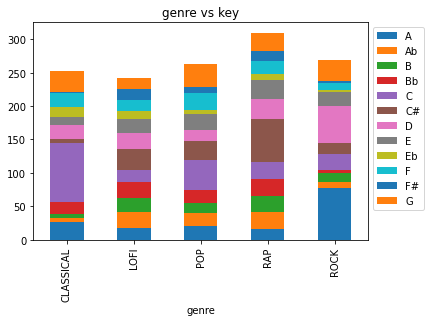

In [17]:
ax = key_df.plot.bar(stacked=True)
ax.set_title("genre vs key", color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


proportion of each key for a particular genre

In [18]:
genre_df.drop('B', axis=1, inplace=True)


#### mode

In [19]:
mode_map = {0: 'minor', 1: 'major'}
genre_df["mode"] = genre_df["mode"].map(mode_map)
mode = pd.get_dummies(genre_df['mode'])
genre_df = pd.concat([genre_df, mode], axis=1)
genre_df.drop('mode', axis=1, inplace=True)


mode_df = pd.pivot_table(genre_df,
                         values=['minor', 'major'],
                         index='genre',
                         aggfunc={"minor": np.sum, "major": np.sum})


[]

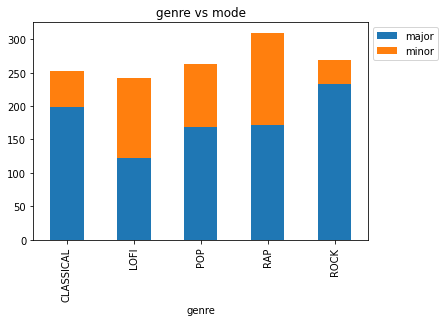

In [20]:
ax = mode_df.plot.bar(stacked=True)
ax.set_title("genre vs mode", color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()


In [21]:
genre_df.drop('minor', axis=1, inplace=True)


#### genre

In [22]:
genre_df["genre"].value_counts()


RAP          310
ROCK         269
POP          263
CLASSICAL    253
LOFI         242
Name: genre, dtype: int64

In [23]:
genre_map = {
    'ROCK': 0,
    'POP': 1,
    'LOFI': 2,
    'CLASSICAL': 3,
    'RAP': 4
}

genre_df["genre"] = genre_df["genre"].map(genre_map)


## Training the model

In [24]:
#separating features from target column

X = genre_df.drop(["genre", "track_name", "artist",
                  "Unnamed: 0"], axis=1)



In [32]:
y = genre_df["genre"]

In [33]:
#splitting data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [112]:
#Using a random forest classifier with multi-class classification

from sklearn.ensemble import RandomForestClassifier
scores = []
for i in range(1, 120):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

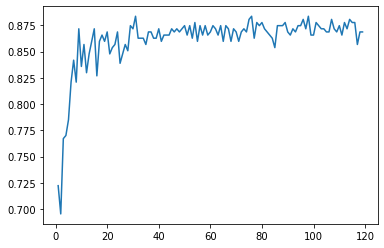

In [113]:
plt.plot(np.arange(1, 120), scores)

In [197]:
final_model = RandomForestClassifier(n_estimators=75)
final_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=75)

In [198]:
#accuracy of model

final_model.score(X_test, y_test)

0.8805970149253731

-> accuracy not higher because pop music is a vast genre, and can have songs with high speechiness like rap, or high energy like rock, or high intrumentalness like lofi or classical

In [199]:
preds = final_model.predict(X_test)

In [200]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        60
           1       0.76      0.77      0.77        71
           2       0.94      0.94      0.94        63
           3       0.98      0.97      0.98        64
           4       0.84      0.83      0.84        77

    accuracy                           0.88       335
   macro avg       0.89      0.89      0.89       335
weighted avg       0.88      0.88      0.88       335



lowest precision for pop (genre: 1)

In [201]:
pickle.dump(final_model, open("model.dat", 'wb'))